## Horror movies exploratory data analysis

### Libraries

In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Data summary

In [9]:
horror_movies <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-01/horror_movies.csv")

Rows: 32540 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): original_title, title, original_language, overview, tagline, post...
dbl   (8): id, popularity, vote_count, vote_average, budget, revenue, runtim...
lgl   (1): adult
date  (1): release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
str(horror_movies)

spec_tbl_df [32,540 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id               : num [1:32540] 760161 760741 882598 756999 772450 ...
 $ original_title   : chr [1:32540] "Orphan: First Kill" "Beast" "Smile" "The Black Phone" ...
 $ title            : chr [1:32540] "Orphan: First Kill" "Beast" "Smile" "The Black Phone" ...
 $ original_language: chr [1:32540] "en" "en" "en" "en" ...
 $ overview         : chr [1:32540] "After escaping from an Estonian psychiatric facility, Leena Klammer travels to America by impersonating Esther,"| __truncated__ "A recently widowed man and his two teenage daughters travel to a game reserve in South Africa. However, their j"| __truncated__ "After witnessing a bizarre, traumatic incident involving a patient, Dr. Rose Cotter starts experiencing frighte"| __truncated__ "Finney Blake, a shy but clever 13-year-old boy, is abducted by a sadistic killer and trapped in a soundproof ba"| __truncated__ ...
 $ tagline          : chr [1:32540] "There's always b

In [12]:
summary(horror_movies)

       id          original_title        title           original_language 
 Min.   :     17   Length:32540       Length:32540       Length:32540      
 1st Qu.: 146495   Class :character   Class :character   Class :character  
 Median : 426521   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 445911                                                           
 3rd Qu.: 707534                                                           
 Max.   :1033095                                                           
                                                                           
   overview           tagline           release_date        poster_path       
 Length:32540       Length:32540       Min.   :1950-01-01   Length:32540      
 Class :character   Class :character   1st Qu.:2000-10-20   Class :character  
 Mode  :character   Mode  :character   Median :2012-12-09   Mode  :character  
                                       Mean   :2007-02-18                   

### Pairs Matrix

Rows: 32,540
Columns: 20
$ id                <dbl> 760161, 760741, 882598, 756999, 772450, 1014226, 717…
$ original_title    <chr> "Orphan: First Kill", "Beast", "Smile", "The Black P…
$ title             <chr> "Orphan: First Kill", "Beast", "Smile", "The Black P…
$ original_language <chr> "en", "en", "en", "en", "es", "es", "en", "en", "en"…
$ overview          <chr> "After escaping from an Estonian psychiatric facilit…
$ tagline           <chr> "There's always been something wrong with Esther.", …
$ release_date      <date> 2022-07-27, 2022-08-11, 2022-09-23, 2022-06-22, 202…
$ poster_path       <chr> "/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg", "/xIGr7UHsKf0URW…
$ popularity        <dbl> 5088.584, 2172.338, 1863.628, 1071.398, 1020.995, 93…
$ vote_count        <dbl> 902, 584, 114, 2736, 83, 1, 125, 1684, 73, 1035, 637…
$ vote_average      <dbl> 6.9, 7.1, 6.8, 7.9, 7.0, 1.0, 5.8, 7.0, 6.5, 6.8, 7.…
$ budget            <dbl> 0, 0, 17000000, 18800000, 0, 0, 20000000, 68000000, …
$ revenue      

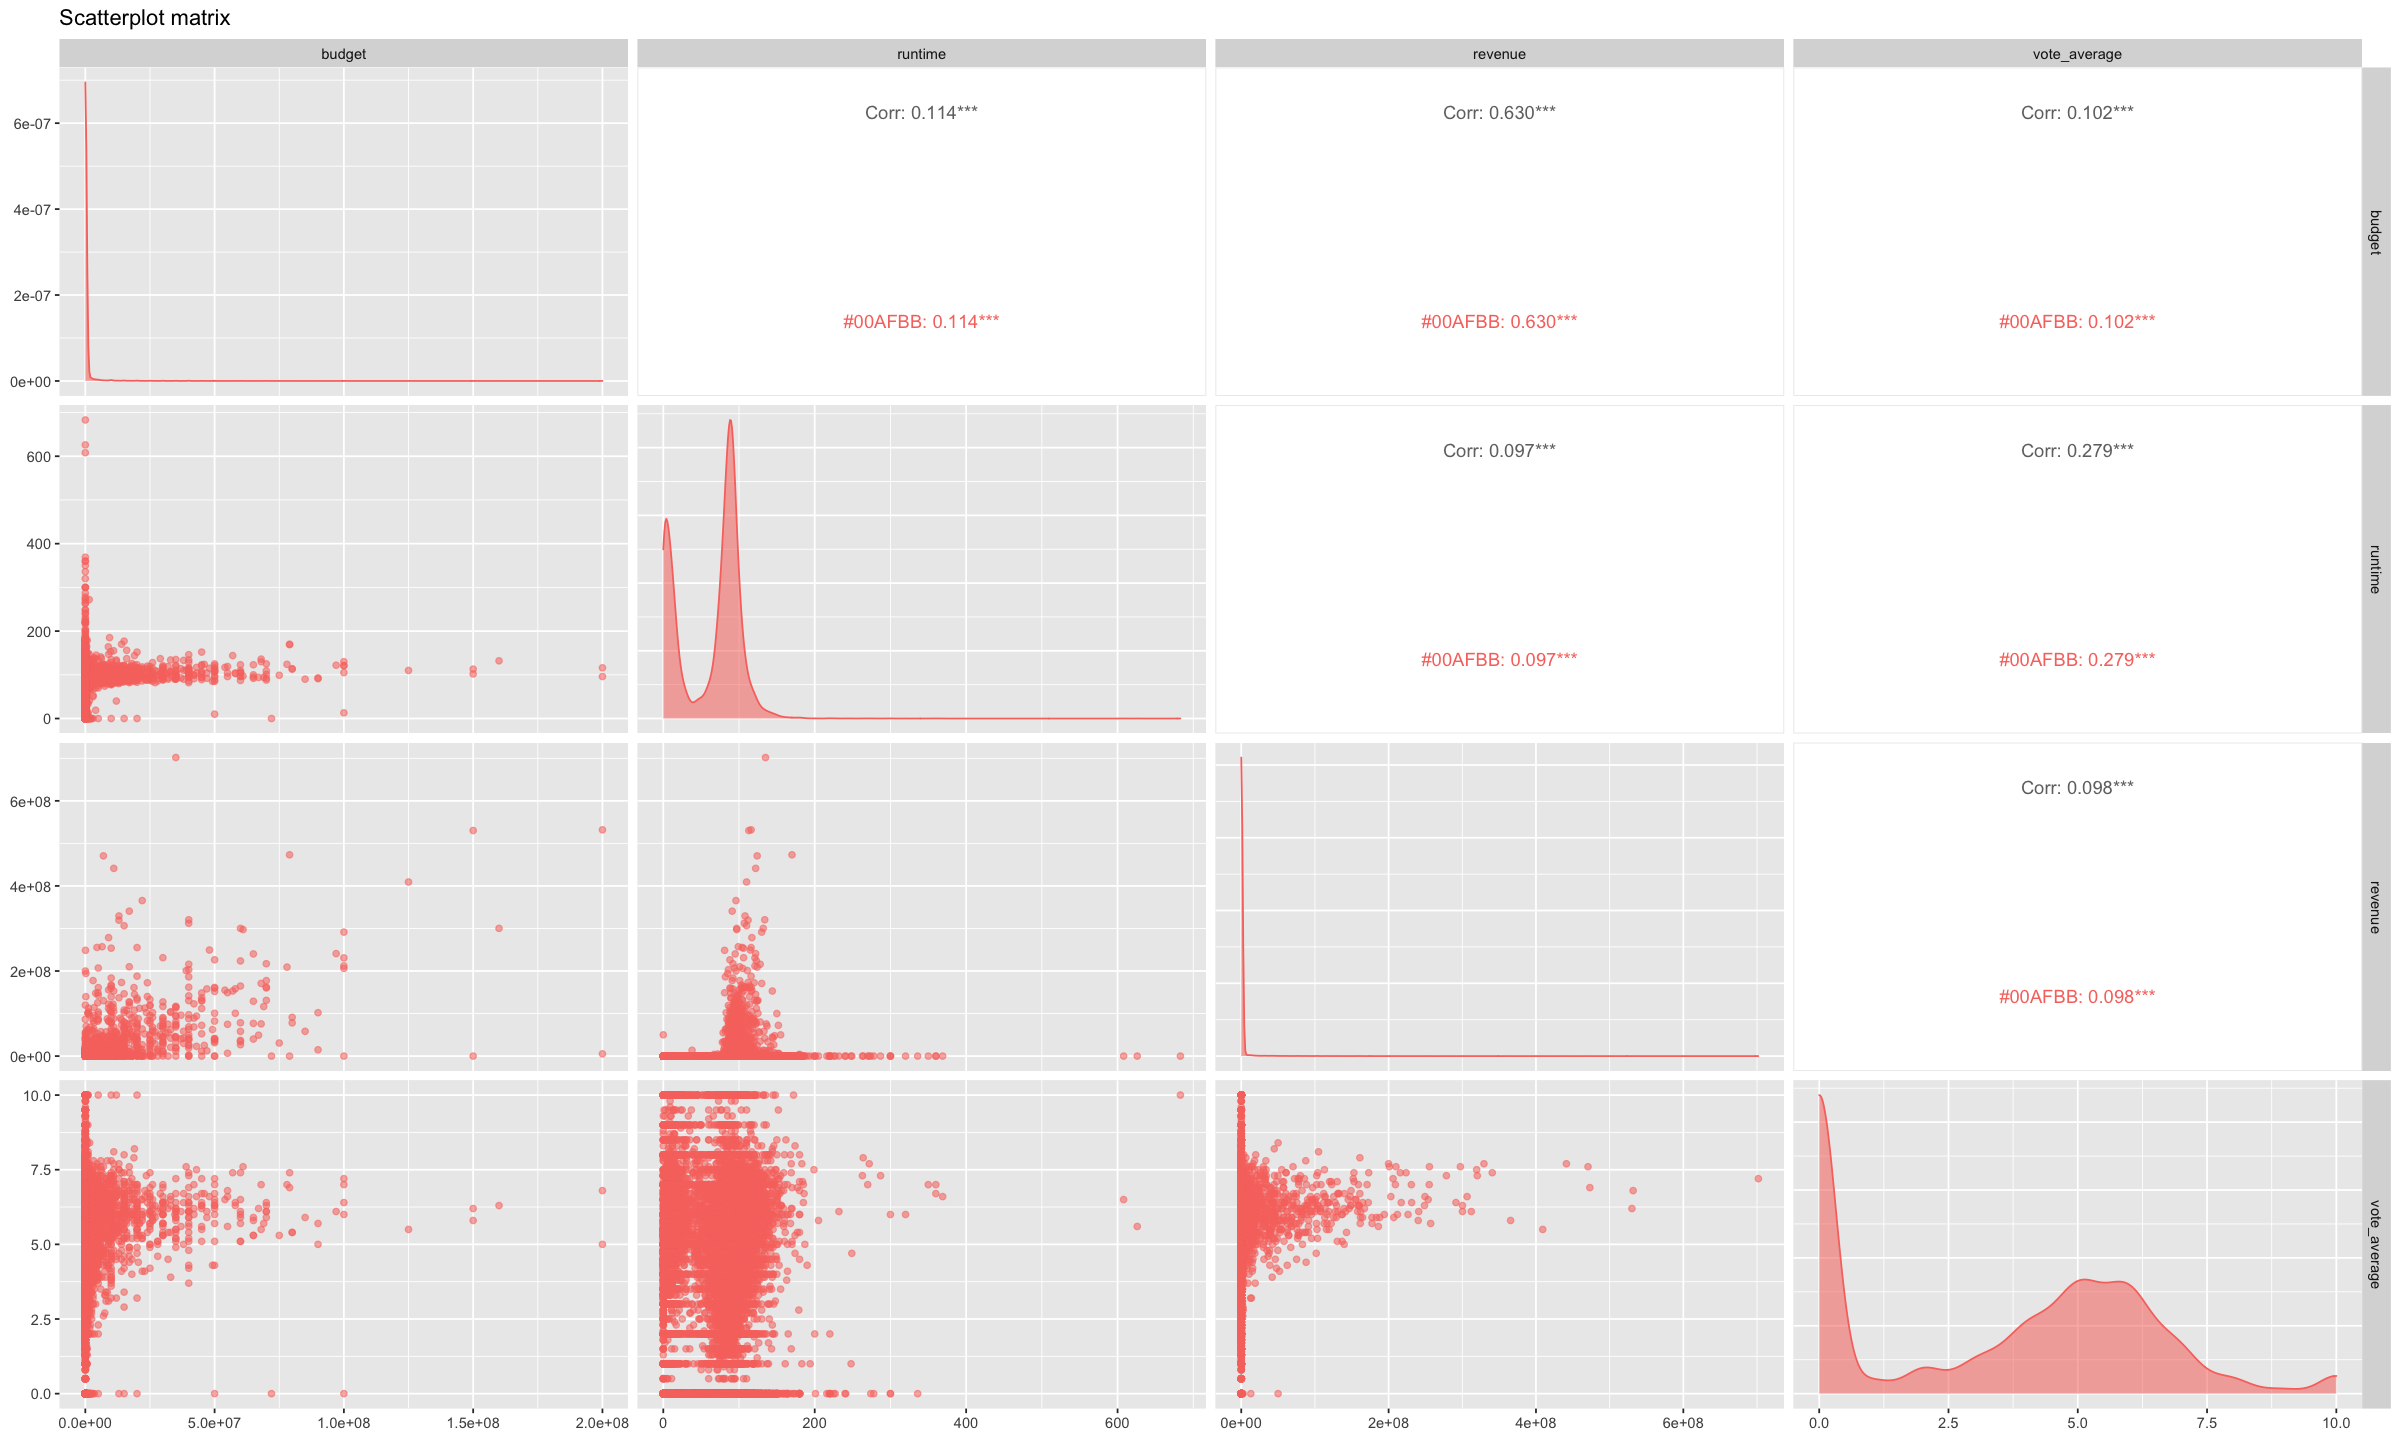

In [28]:
options(repr.plot.width = 20, repr.plot.height = 12)
data_movie <- glimpse(horror_movies) |>
    select(budget, runtime, revenue, vote_average) 
    |> drop_na()

pairs <- GGally::ggpairs(data_movie, aes(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB"), progress = FALSE) +
    ggtitle('Scatterplot matrix') 

# Show the plot
pairs

### Correlation exploration

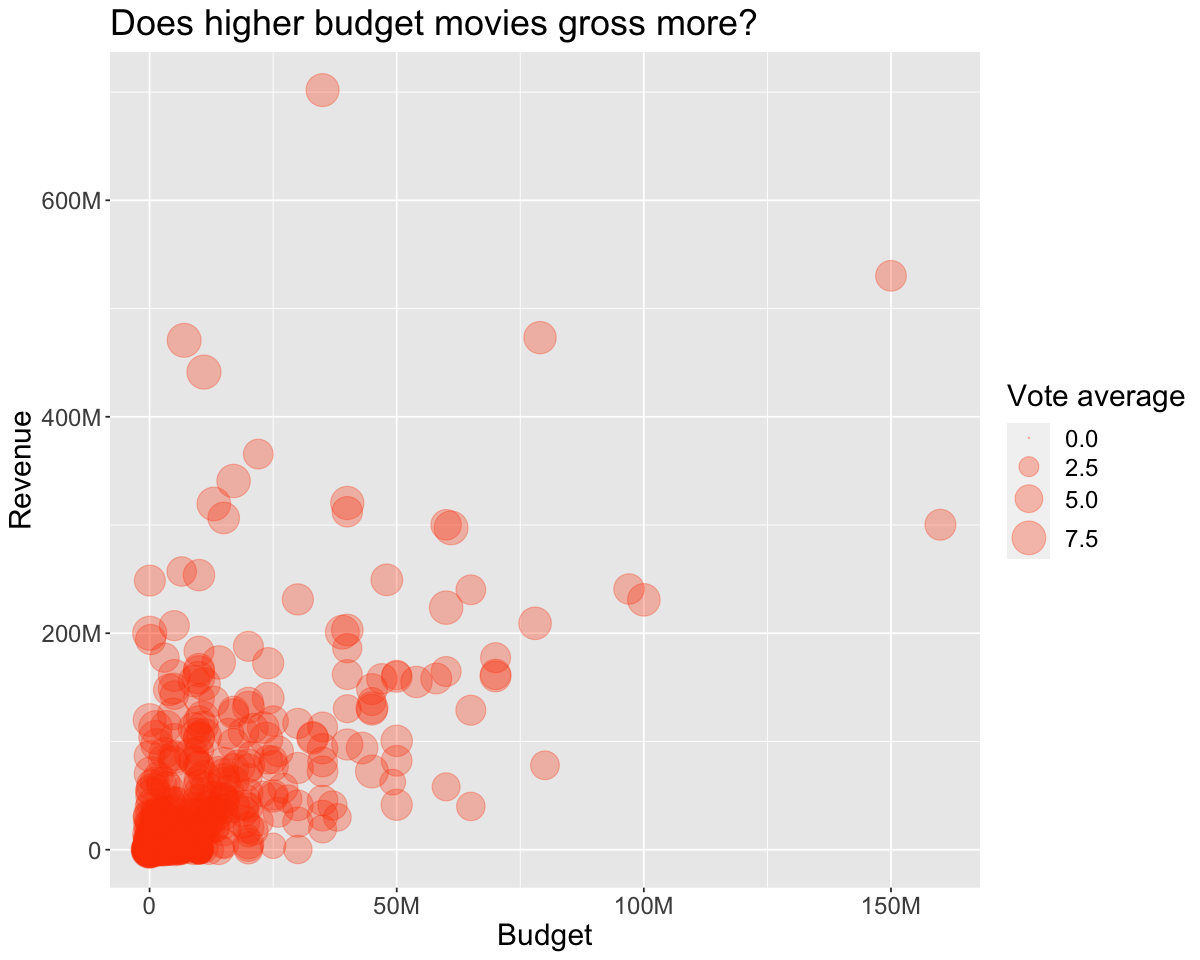

In [101]:
options(repr.plot.width = 10, repr.plot.height = 8)
horror_scatter_bud <- horror_movies |> 
    drop_na() |> 
    ggplot(aes(x = budget, y = revenue, size = vote_average)) +
        geom_point(alpha = 0.3, color="#ff4500") +
        ggtitle('Does higher budget movies gross more?') +
        labs(x = 'Budget', y = 'Revenue', size = 'Vote average') +
        scale_colour_manual(values = "blue") +
        theme(text =  element_text(size = 18)) +
        scale_size(range = c(0, 10)) +
        scale_y_continuous(labels = scales::label_number_si()) +
        scale_x_continuous(labels = scales::label_number_si()) 
        

horror_scatter_bud

### Distributions

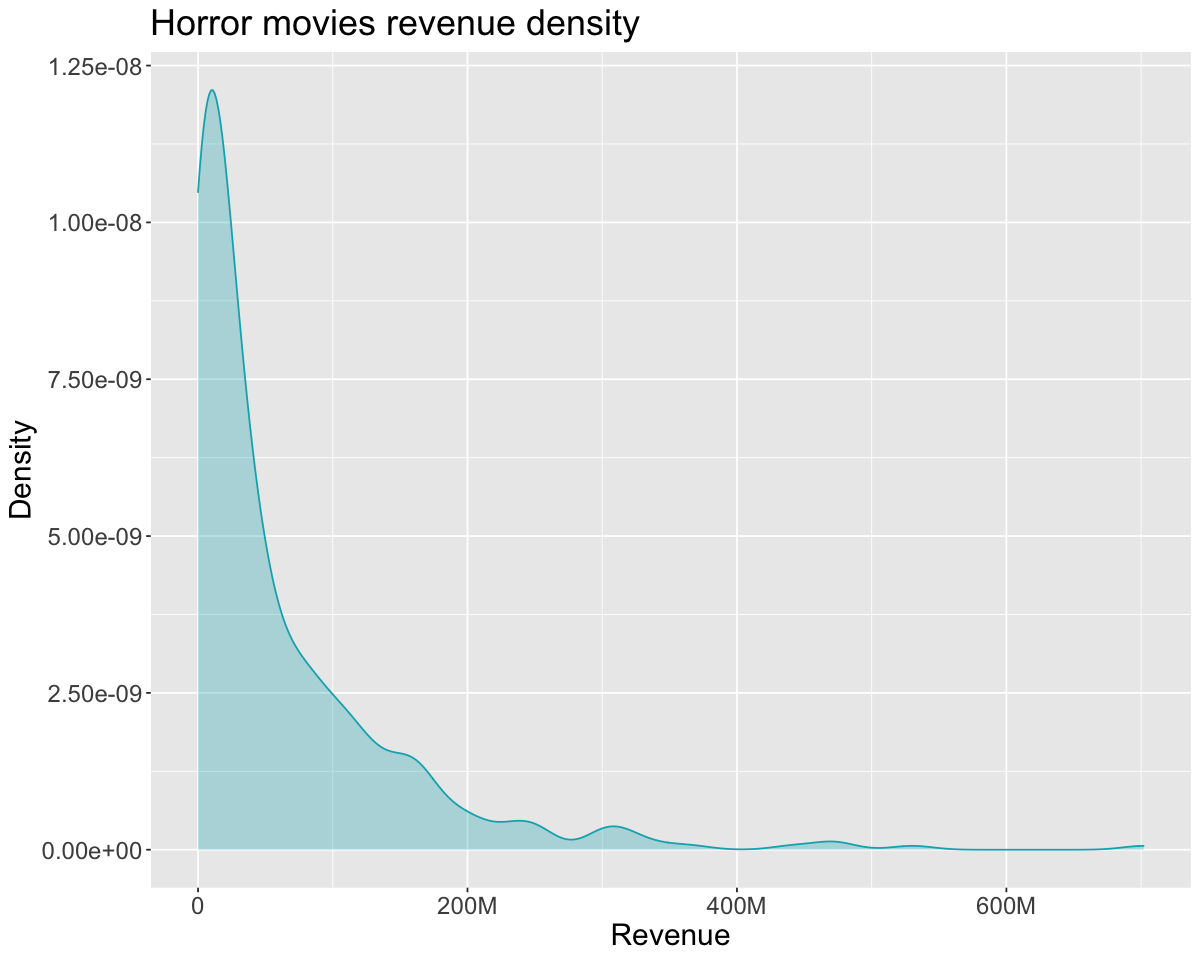

In [113]:
options(repr.plot.width = 10, repr.plot.height = 8)
revenue_density <- horror_movies |> 
    filter(revenue>0) |> 
    drop_na() |> 
    ggplot(aes(x = revenue)) + 
    geom_density(color = "#00AFBB", alpha= 0.3, fill = "#00AFBB") + 
    ggtitle('Horror movies revenue density') +
    scale_x_continuous(labels = scales::label_number_si()) +
    theme(text =  element_text(size = 18)) +
    labs(x = 'Revenue', y = 'Density')
    

# Show the plot
revenue_density